In [1]:
#|default_exp app

In [2]:
#|export
from fastbook import *
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

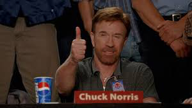

In [3]:
im = PILImage.create('Happy.jpg')
im.thumbnail((192,192))
im

In [4]:
#|export
learn = load_learner('export.pkl')

In [5]:
learn.predict(im)

('Angry', tensor(0), tensor([0.9015, 0.0535, 0.0450]))

In [6]:
#|export
categories = ('Happy','Angry','Sad')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories,map(float,probs)))

In [7]:
classify_image(im)

{'Happy': 0.9014582633972168,
 'Angry': 0.053492531180381775,
 'Sad': 0.045049186795949936}

In [8]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['Happy.jpg','Angry.jpg','Sad.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7863/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x7f40fb180340>,
 'http://127.0.0.1:7863/',
 None)

In [9]:
m = learn.model

In [10]:
ps = list(m.parameters())

In [11]:
ps[1]

Parameter containing:
tensor([ 0.0847,  0.1213,  0.1149,  0.0919,  0.1221,  0.0990,  0.0823,  0.1492,  0.1174, -1.0657,  0.1615,  0.1042,  0.1261,  0.1031,  0.0798,  0.0966,  0.1092,  0.1245,  0.1164,  0.1969,  0.1133,
         0.1430,  0.0837,  0.1624,  0.1056,  0.1082,  0.1151,  0.1516,  0.1790, -0.1125, -2.2404,  0.1376,  0.1088,  0.1162,  0.1032,  0.1153,  0.1052,  0.1761,  0.1335, -1.6697,  0.1002,  0.1112,
         0.1427,  0.1894,  0.1213,  0.1153,  0.1135,  0.1065,  0.0948,  0.2194,  0.1100,  0.0924,  1.7131,  0.0995,  0.1193,  0.1037,  0.0805,  0.1110, -0.1199,  0.1087,  0.1142,  0.1253,  0.1061,
         0.1073,  0.1463,  0.1309,  0.1000,  0.1631,  0.0978,  0.2313,  0.0941,  0.1842,  0.2002,  0.1056,  0.1362, -0.1158,  0.1057,  0.0934,  0.0871,  0.1185,  0.1062,  0.1125,  0.1268,  0.0884,
         0.1072,  0.1116,  0.0925, -0.1439,  0.1036,  0.1906,  0.0977,  0.1440,  0.1148,  0.1209,  0.1406,  0.1080,  0.1351,  0.1092,  0.1161,  1.4064,  0.1085,  0.1177,  0.2712,  0.0859,  0

In [12]:
ps[0].shape

torch.Size([128, 3, 4, 4])

In [13]:
ps[0]

Parameter containing:
tensor([[[[ 0.0676, -0.0087,  0.0545,  0.0086],
          [-0.0414,  0.0410,  0.0634, -0.0536],
          [ 0.0205, -0.0519, -0.0312, -0.1045],
          [ 0.0402,  0.0342, -0.0317,  0.0408]],

         [[ 0.0604, -0.0973,  0.0038,  0.0102],
          [-0.0717, -0.0307,  0.1300, -0.0020],
          [ 0.0316, -0.0194,  0.0203, -0.0690],
          [ 0.0267, -0.0329, -0.0871,  0.0848]],

         [[ 0.0095, -0.0773, -0.0409, -0.0117],
          [-0.0157,  0.0584,  0.0806,  0.0139],
          [ 0.0080,  0.0120,  0.0473,  0.0032],
          [-0.0202, -0.0610, -0.0463,  0.0379]]],


        [[[ 0.0125,  0.0295, -0.0431, -0.0239],
          [ 0.1037,  0.0095, -0.0408, -0.0435],
          [-0.0238, -0.0353,  0.0906,  0.0512],
          [-0.0780, -0.0395,  0.0631,  0.0223]],

         [[ 0.0176,  0.0215, -0.0735, -0.0386],
          [ 0.1796,  0.0281, -0.0918, -0.0697],
          [-0.0159, -0.0721,  0.0837,  0.0534],
          [-0.1013, -0.0632,  0.0769,  0.0209]],

      

In [14]:
#This part is for exporting
from nbdev.export import notebook2script

In [15]:
notebook2script('app.ipynb')

Converted app.ipynb.
